In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
from numpy.core.fromnumeric import mean
predictions = [
3.11415867,
8.2253255 ,
5.8922111 , -1.87553831,  9.07012172,
6.92557795,  1.26419839,  0.76398589,
1.305015  ,  6.98353867,
8.77770682,  0.45093605,  8.61292039,  3.59981486,  6.37875607,
2.91760912,  0.34150839, 10.82999356,  1.73490368,
2.3629085 ,
0.26112322,  7.67820773,  6.08454624,  2.50819501,  0.64470028,3.56554851,  5.14229458,  2.6512313 ,  2.13305295, 1.7172331 ,0.244182]

print(st.mean(predictions))


3.8808376432258065


In [ ]:
#split dataset in features and target variable

In [ ]:
training_data, test_data = train_test_split(df, train_size = 0.70, test_size = 0.20, shuffle = False)
print(training_data)
print(test_data)

In [ ]:
#Declare feature vector and targe variable
x = df. drop(['Account Length', 'Churn?'],axis=1)
y = df['Churn?']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=.30)

In [ ]:
X_train.shape, X_test.shape

((2333, 18), (1000, 18))

In [ ]:
df_train.dtypes
df_test.dtypes

Random Forest


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("churndata.csv")

#Mapping String columns, which contains Yes and No, to 0 and 1. We will treat unknown values as no
df ["Int'l Plan"] = df["Int'l Plan"].map({'no':0, 'yes' :1, 'unknown':0 })
df['VMail Plan'] = df["VMail Plan"].map({'no':0, 'yes' :1, 'unknown':0 })
df['Churn?'] = df['Churn?'].map({'False.':0, 'True.':1})

#Split the data into Features X and target y
X = df.drop('Churn?', axis=1)
y = df['Churn?']

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

rf =RandomForestClassifier()
rf.fit(X_train, y_train)


for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)


# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


data_frame = pd.read_csv("churndata.csv")

#remap the row data types from String to int
data_frame["Int'l Plan"] = data_frame["Int'l Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame["VMail Plan"] = data_frame["VMail Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame['Churn?'] = data_frame['Churn?'].map({'False.':0,'True.':1})


#distribution of classes
#separate the rows with the true value for churn and those with false
false_churn_df = data_frame[data_frame['Churn?']==0]
true_churn_df = data_frame[data_frame['Churn?']==1]

#feature_df contains all the columns in data_frame except for Churn? since Churn? will be the dependent variable
feature_df = data_frame[['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls']]


# x denotes the independent variable
x = np.asarray(feature_df)
# y denotes the dependent variable
y = np.asarray(data_frame["Churn?"])

#divide the data into training, unseen data and testing data
train_ratio = 0.70
test_ratio = 0.20
unseen_ratio = 0.10

x_train, x_unseen, y_train, y_unseen = train_test_split(x, y, test_size=1 - train_ratio)
x_test, x_unseen, y_test, y_unseen = train_test_split(x_unseen, y_unseen, test_size=unseen_ratio/(unseen_ratio + test_ratio))


#create svm model
classifier = svm.SVC(kernel = "linear", gamma = "auto", C = 2)
classifier.fit(x_train, y_train)

y_test_prediction = classifier.predict(x_test)
y_unseen_prediction = classifier.predict(x_unseen)

#evaluate the results of the model
accuracy = accuracy_score(y_test, y_test_prediction)
precision = precision_score(y_test, y_test_prediction)
recall = recall_score(y_test, y_test_prediction)
cm = confusion_matrix(y_test, y_test_prediction)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)



FileNotFoundError: ignored

Naive Baye Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


data_frame = pd.read_csv("churndata.csv")

#remap the row data types from String to int
data_frame["Int'l Plan"] = data_frame["Int'l Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame["VMail Plan"] = data_frame["VMail Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame['Churn?'] = data_frame['Churn?'].map({'False.':0,'True.':1})


#distribution of classes
#separate the rows with the true value for churn and those with false
false_churn_df = data_frame[data_frame['Churn?']==0]
true_churn_df = data_frame[data_frame['Churn?']==1]

#feature_df contains all the columns in data_frame except for Churn? since Churn? will be the dependent variable
feature_df = data_frame[['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls']]


# x denotes the independent variable
x = np.asarray(feature_df)
# y denotes the dependent variable
y = np.asarray(data_frame["Churn?"])

#divide the data into training, unseen data and testing data

train_ratio = 0.70
test_ratio = 0.20
unseen_ratio = 0.10

x_train, x_unseen, y_train, y_unseen = train_test_split(x, y, test_size=1 - train_ratio)
x_test, x_unseen, y_test, y_unseen = train_test_split(x_unseen, y_unseen, test_size=test_ratio/(test_ratio + unseen_ratio),random_state=100)







Random Forest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay


data_frame = pd.read_csv("churndata.csv")

#remap the row data types from String to int
data_frame["Int'l Plan"] = data_frame["Int'l Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame["VMail Plan"] = data_frame["VMail Plan"].map({'no':0,'yes':1,'unknown':0})
data_frame['Churn?'] = data_frame['Churn?'].map({'False.':0,'True.':1})


#distribution of classes
#separate the rows with the true value for churn and those with false
false_churn_df = data_frame[data_frame['Churn?']==0]
true_churn_df = data_frame[data_frame['Churn?']==1]

#feature_df contains all the columns in data_frame except for Churn? since Churn? will be the dependent variable
feature_df = data_frame[['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls']]


# x denotes the independent variable
x = np.asarray(feature_df)
# y denotes the dependent variable
y = np.asarray(data_frame["Churn?"])

#divide the data into training, unseen data and testing data

train_ratio = 0.70
test_ratio = 0.20
unseen_ratio = 0.10

x_train, x_unseen, y_train, y_unseen = train_test_split(x, y, test_size=1 - train_ratio)
x_test, x_unseen, y_test, y_unseen = train_test_split(x_unseen, y_unseen, test_size=test_ratio/(test_ratio + unseen_ratio),random_state=100)







# Decision Tree

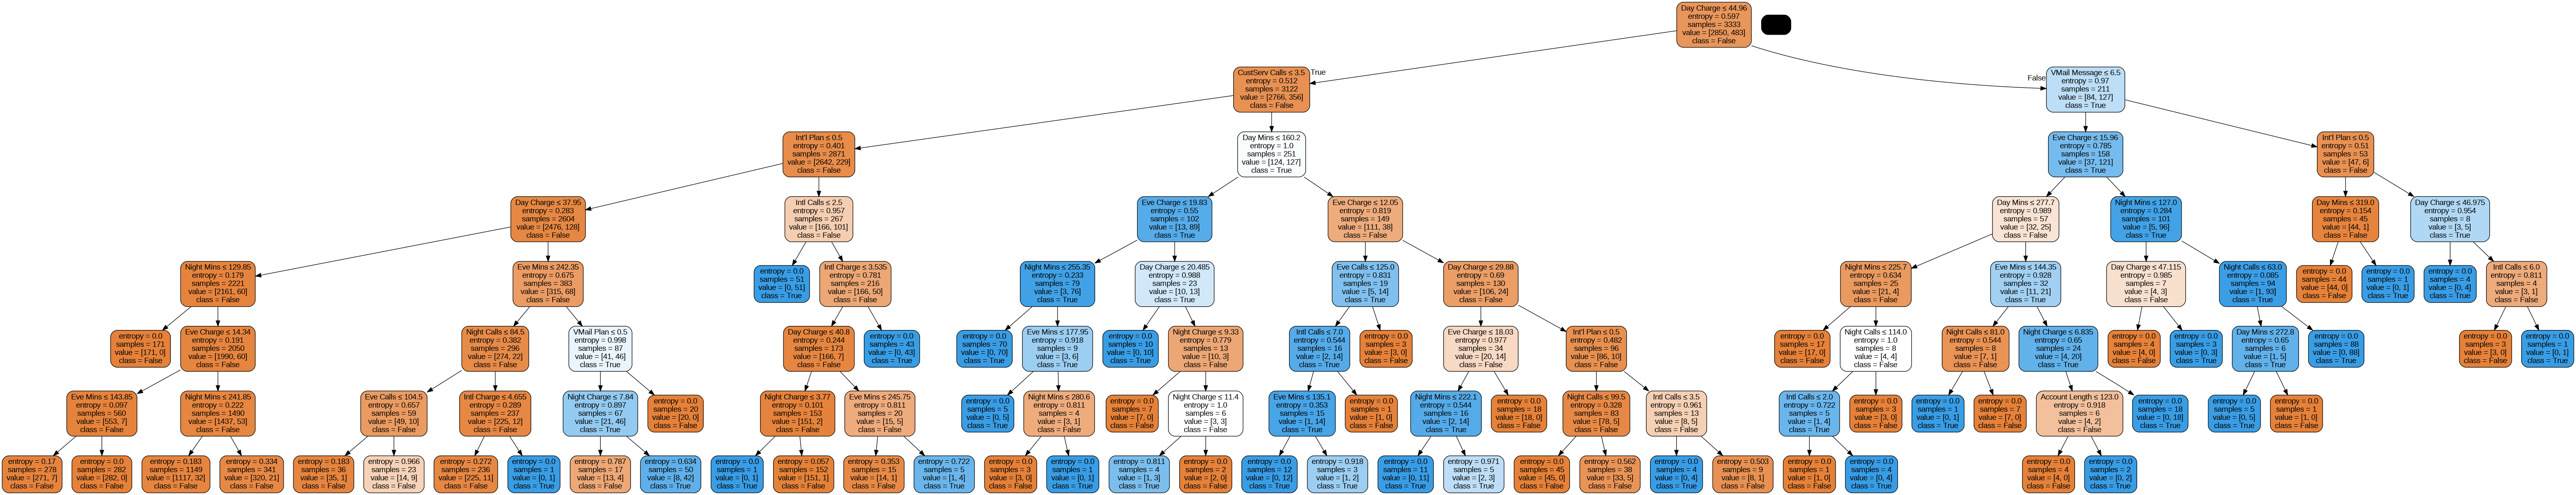

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

df = pd.read_csv('churndata.csv')
df

#Determine the feature (independent variable) and the target (dependent variable)
feature_cols = ['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins','Day Calls','Day Charge',
            'Eve Mins','Eve Calls','Eve Charge',	'Night Mins',	'Night Calls',	'Night Charge',
             'Intl Mins',	'Intl Calls',	'Intl Charge',	'CustServ Calls']
df["Int'l Plan"] = df["Int'l Plan"].map({'no':0,'yes':1,'unknown':0})#Mapping Yes, No, and Unknown to 0s and 1s
df['VMail Plan'] = df['VMail Plan'].map({'no':0,'yes':1,'unknown':0})#Mapping Yes, No, and Unknown to 0s and 1s
X = df[feature_cols]#Independent Variables
y = df['Churn?']#Dependent Variable

# Create Decision Tree classifer object
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)

# Train Decision Tree Classifer
decision_tree = decision_tree.fit(X,y)

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['False','True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('result.png')
Image(graph.create_png())#Generates and image of the decision tree

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import tree
text_representation = tree.export_text(decision_tree, feature_names=feature_cols)
print(text_representation)

|--- Day Charge <= 44.96
|   |--- CustServ Calls <= 3.50
|   |   |--- Int'l Plan <= 0.50
|   |   |   |--- Day Charge <= 37.95
|   |   |   |   |--- Night Mins <= 129.85
|   |   |   |   |   |--- class: False.
|   |   |   |   |--- Night Mins >  129.85
|   |   |   |   |   |--- Eve Charge <= 14.34
|   |   |   |   |   |   |--- Eve Mins <= 143.85
|   |   |   |   |   |   |   |--- class: False.
|   |   |   |   |   |   |--- Eve Mins >  143.85
|   |   |   |   |   |   |   |--- class: False.
|   |   |   |   |   |--- Eve Charge >  14.34
|   |   |   |   |   |   |--- Night Mins <= 241.85
|   |   |   |   |   |   |   |--- class: False.
|   |   |   |   |   |   |--- Night Mins >  241.85
|   |   |   |   |   |   |   |--- class: False.
|   |   |   |--- Day Charge >  37.95
|   |   |   |   |--- Eve Mins <= 242.35
|   |   |   |   |   |--- Night Calls <= 84.50
|   |   |   |   |   |   |--- Eve Calls <= 104.50
|   |   |   |   |   |   |   |--- class: False.
|   |   |   |   |   |   |--- Eve Calls >  104.50
|   |   |

Rule-based Classification

In [ ]:
pip install wittgenstein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.8/124.8 KB 3.5 MB/s eta 0:00:00


In [ ]:
# Import of libraries
import numpy as np
import wittgenstein as lw
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading csv file.
df = pd.read_csv('churndata.csv')
X = df.drop(['Account Length','Churn?'], axis=1)
y = df['Churn?']

#Splits the data set.
X_train, X_test = train_test_split(df, test_size =.30,random_state=42)

# Build model using RIPPER or IREP.
clf = lw.RIPPER()
clf.fit(X_train, class_feat='Churn?',pos_class='True.')

#Displays the generated classifiers
clf.ruleset_.out_pretty()


[[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=244.0-267.06] V
["IntlPlan=yes" ^ IntlCalls=<2.0] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=>267.06] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=225.74-244.0] V
["IntlPlan=yes" ^ IntlMins=>13.7] V
[CustServCalls=4 ^ DayMins=<110.9] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=213.4-225.74] V
[CustServCalls=4 ^ DayMins=110.9-134.8] V
[CustServCalls=5 ^ DayMins=110.9-134.8] V
[CustServCalls=6 ^ IntlCalls=<2.0] V
[DayMins=224.7-250.46 ^ EveMins=>267.06 ^ VMailPlan=no] V
[DayMins=>250.46 ^ VMailPlan=no ^ NightMins=>264.28 ^ EveMins=201.0-213.4] V
[CustServCalls=4 ^ DayMins=134.8-150.6] V
[AccountLength=99.0-110.0 ^ CustServCalls=6] V
["IntlPlan=yes" ^ IntlMins=12.5-13.7 ^ VMailMessage=25.0-32.0] V
[CustServCalls=7] V
[VMailPlan=no ^ "IntlPlan=yes" ^ IntlMins=12.5-13.7] V
[EveCharge=14.64-15.94 ^ CustServCalls=4]]


/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-pa

In [ ]:
# Import of libraries
import numpy as np
import wittgenstein as lw
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading csv file.
df = pd.read_csv('churndata.csv')
X = df.drop(['Account Length','Churn?'], axis=1)
y = df['Churn?']

#Splits the data set.
X_train, X_test = train_test_split(df, test_size =.30, random_state=42)

# Build model using RIPPER or IREP.
clf = lw.RIPPER()
clf.fit(X_train, class_feat='Churn?',pos_class='True.')

#Displays the generated classifiers
clf.ruleset_.out_pretty()


[["IntlPlan=yes" ^ IntlCalls=<2.0] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=244.0-267.06] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=225.74-244.0] V
[CustServCalls=5 ^ DayMins=110.9-134.8] V
[DayMins=>250.46 ^ VMailPlan=no ^ IntlCalls=2.0-3.0 ^ EveCalls=84.0-90.0] V
[DayMins=>250.46 ^ VMailPlan=no ^ EveMins=>267.06] V
["IntlPlan=yes" ^ IntlMins=>13.7] V
[CustServCalls=4 ^ DayMins=110.9-134.8] V
[CustServCalls=4 ^ DayMins=<110.9] V
[CustServCalls=5 ^ EveMins=158.14-172.16] V
[CustServCalls=6 ^ IntlCalls=<2.0] V
[DayMins=224.7-250.46 ^ EveMins=>267.06 ^ VMailPlan=no] V
[DayMins=>250.46 ^ VMailPlan=no ^ NightMins=>264.28 ^ CustServCalls=2] V
[CustServCalls=4 ^ DayMins=150.6-166.5 ^ NightMins=243.16-264.28] V
[CustServCalls=5 ^ EveMins=<137.34] V
["IntlPlan=yes" ^ IntlMins=12.5-13.7 ^ VMailMessage=25.0-32.0] V
[CustServCalls=4 ^ DayMins=134.8-150.6] V
[DayMins=>250.46 ^ AccountLength=66.0-79.0 ^ EveCalls=<74.0] V
[CustServCalls=7]]


/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-packages/wittgenstein/base.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  covered = covered.append(rule.covers(df))
/usr/local/lib/python3.9/dist-pa